In [634]:
import pandas as pd
import matplotlib.pyplot as plt
import psycopg2
import nltk as nltk
import re
import seaborn as sns
from textblob import TextBlob
import string
from wordcloud import WordCloud 
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aperniah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [635]:
def connect_db(user,password,host,port,database):
    connection = psycopg2.connect(user = user,
                                  password = password,
                                  host = host,
                                  port = port,
                                  database = database)
            
    return connection

In [636]:
def cursor_init(connection):
    cursor = connection.cursor()
    cursor.execute("SELECT version();")
    record = cursor.fetchone()
    print("You are connected to - ", record,"\n")  
    return cursor

In [637]:
def select_tuits(topic,cursor):
    #json.dumps(x)
    script = f"Select tweet,topic FROM data_tweets where topic = '{topic}'"
    cursor.execute(script)
    return cursor

In [638]:
def transform_data(cursor):
    tweets = []
    columns = cursor.description
    for t in cursor.fetchall():
        tweet = t[0]
        tweets.append([tweet['id'], 
                    tweet['full_text'],
                    tweet['retweet_count'],
                    tweet['favorite_count'],
                    tweet['created_at'],
                    tweet['user']['screen_name'], 
                    [i['screen_name'] for i in tweet['entities']['user_mentions']],
                    tweet['user']['description'],
                    tweet['user']['verified'],
                    tweet['user']['location'],
                    tweet['user']['statuses_count'], 
                    tweet['user']['followers_count'], 
                    tweet['user']['friends_count'], 
                    tweet['user']['favourites_count'], 
                    tweet['user']['created_at'], 
                    tweet['user']['profile_image_url'],
                    tweet['user']['created_at'],
                    t[1]])

    return tweets

In [639]:
topico_a='trump'
topico_b='biden'
topico_a2='donald trump'
topico_b2='joe biden'
columns = ['id' , 'full_text', 'retweet_count', 'favorite_count', 'created_at', 'user_screen_name' , 'user_mentions', 'user_description', 'user_verified', 'user_location', 'user_statuses_count' , 'user_followers_count' , 'user_friends_count' , 'user_favourites_count' , 'user_created_at' , 'user_profile_image_url', 'user_created_at', 'topic']

In [640]:
connection = connect_db(cred.database_user,cred.database_pass,"192.168.0.22",'5432','data_tweets')
cursor_a = cursor_init(connection)
cursor_b = cursor_init(connection)

You are connected to -  ('PostgreSQL 12.4 (Ubuntu 12.4-1.pgdg20.04+1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.3.0-10ubuntu2) 9.3.0, 64-bit',) 

You are connected to -  ('PostgreSQL 12.4 (Ubuntu 12.4-1.pgdg20.04+1) on x86_64-pc-linux-gnu, compiled by gcc (Ubuntu 9.3.0-10ubuntu2) 9.3.0, 64-bit',) 



In [641]:
d_a = select_tuits(topico_a, cursor_a)

In [642]:
d_b = select_tuits(topico_b, cursor_b)

In [643]:
data_a = transform_data(d_a)


In [644]:
data_b = transform_data(d_b)


In [645]:
df_a = pd.DataFrame(data_a,columns=columns)
df_b = pd.DataFrame(data_b,columns=columns)

In [646]:
df_a.count()[1],df_b.count()[1]

(6990, 1025)

In [647]:
def transform2(text):
    stopWords = set(stopwords.words('spanish'))
    text = str(text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # Remover menciones 
    text = re.sub(r'RT[\s]', ' ', text) # Remover RTs
    text = re.sub(r'#', ' ', text) # Remover # en el tweet
    text = re.sub(r'https?:\/\/\S+', ' ', text) #Remover links
    text = text.lower().replace('jaja','')
    text = text.lower().replace(' ja ','')
    text = text.lower().replace(' va ','')
    text = text.lower().replace(' si ','')
    text = text.lower().replace(' ser ','')
    #text = re.sub(r'',' ',text)
    words = text.lower().split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in words]
    no_garbage = [w for w in stripped if not w in stopWords]
    return (' '.join(no_garbage))

In [648]:
def transform(text):
    text = str(text)
    text = re.sub(r'@[A-Za-z0-9]+', ' ', text) # Remover menciones 
    text = re.sub(r'RT[\s]', ' ', text) # Remover RTs
    text = re.sub(r'#', ' ', text) # Remover # en el tweet
    text = re.sub(r'https?:\/\/\S+', ' ', text) #Remover links
    text = text.lower().replace('jaja','')
    #text = re.sub(r'',' ',text)
    words = text.lower().split()
    re_punc = re.compile('[%s]' % re.escape(string.punctuation))
    stripped = [re_punc.sub('', w) for w in words]
    return (' '.join(stripped))

In [649]:
df_a['tuit_text_transform'] = df_a ['full_text'].apply(transform)
df_b['tuit_text_transform'] = df_b ['full_text'].apply(transform)
df_a['tuit_text_transform2'] = df_a ['full_text'].apply(transform2)
df_b['tuit_text_transform2'] = df_b ['full_text'].apply(transform2)

In [650]:
df_b.head()

,id,full_text,retweet_count,favorite_count,created_at,user_screen_name,user_mentions,user_description,user_verified,user_location,user_statuses_count,user_followers_count,user_friends_count,user_favourites_count,user_created_at,user_profile_image_url,user_created_at,topic,tuit_text_transform,tuit_text_transform2
0,1311783801022971904,"Repito, hasta ahora NO he visto ningún argumen...",0,0,Thu Oct 01 21:43:24 +0000 2020,BarbaraKenobi,[],Cualquiera cosa. XXIV,False,BAires,112936,1072,487,32289,Sat Oct 11 13:12:33 +0000 2008,http://pbs.twimg.com/profile_images/1261508051...,Sat Oct 11 13:12:33 +0000 2008,biden,repito hasta ahora no he visto ningún argument...,repito ahora visto ningún argumento económico ...
1,1312165642934513665,la pelotuda se va a vivir a estados unidos y a...,0,1,Fri Oct 02 23:00:42 +0000 2020,shirib1,[],🐍🗽,False,"Buenos Aires, Argentina",24809,155,497,23701,Sat Jun 09 06:53:37 +0000 2018,http://pbs.twimg.com/profile_images/1307564020...,Sat Jun 09 06:53:37 +0000 2018,biden,la pelotuda se va a vivir a estados unidos y a...,pelotuda vivir unidos apoya biden dios da pan ...
2,1312165463384702976,Alberto Fernández no cree en las encuestas que...,0,0,Fri Oct 02 22:59:59 +0000 2020,luchopicardi,[],🇦🇷,False,"Rosario, Argentina",23472,3827,4999,9265,Wed Apr 27 01:57:32 +0000 2011,http://pbs.twimg.com/profile_images/1274553872...,Wed Apr 27 01:57:32 +0000 2011,biden,alberto fernández no cree en las encuestas que...,alberto fernández cree encuestas dan ganador b...
3,1313598818232008705,@TodosMenosMil Biden es cero peronista,0,1,Tue Oct 06 21:55:38 +0000 2020,merlinojo,[TodosMenosMil],Peronista 🇦🇷✌🏼,False,"Buenos Aires, Argentina",1282,144,228,4362,Tue May 11 21:55:15 +0000 2010,http://pbs.twimg.com/profile_images/7726983919...,Tue May 11 21:55:15 +0000 2010,biden,biden es cero peronista,biden cero peronista
4,1313598014309765120,@aleberco Los aportantes de Biden...,0,0,Tue Oct 06 21:52:26 +0000 2020,FranciscoFinet,[aleberco],"Abogado, Riverplatense, cinefilo, con pizcas d...",False,Olavarria,2326,121,510,6112,Mon Dec 07 18:45:03 +0000 2009,http://pbs.twimg.com/profile_images/6877988542...,Mon Dec 07 18:45:03 +0000 2009,biden,los aportantes de biden,aportantes biden


In [651]:
df_a.head()

,id,full_text,retweet_count,favorite_count,created_at,user_screen_name,user_mentions,user_description,user_verified,user_location,user_statuses_count,user_followers_count,user_friends_count,user_favourites_count,user_created_at,user_profile_image_url,user_created_at,topic,tuit_text_transform,tuit_text_transform2
0,1313630085581287424,Me serví un plato gigante de lasaña de berenje...,0,6,Tue Oct 06 23:59:53 +0000 2020,marikarne,[],"Kuka, trolo y mostra. El orden puede variar.",False,"Buenos Aires, Argentina",47938,1401,296,44349,Tue Oct 30 23:53:37 +0000 2012,http://pbs.twimg.com/profile_images/1191485751...,Tue Oct 30 23:53:37 +0000 2012,trump,me serví un plato gigante de lasaña de berenje...,serví plato gigante lasaña berenjenas puré aho...
1,1313629895432581120,bueno eh se les informa que TRUMP prohibió ste...,0,0,Tue Oct 06 23:59:07 +0000 2020,_lechuguita_,[],ig: _lechu_diego,False,"Lomas de Zamora, Argentina",5220,137,183,2500,Tue Dec 23 21:21:11 +0000 2014,http://pbs.twimg.com/profile_images/1252030531...,Tue Dec 23 21:21:11 +0000 2014,trump,bueno eh se les informa que trump prohibió ste...,bueno eh informa trump prohibió steam eeuu por...
2,1313629867645251584,@Linxz_7 @realDonaldTrump Trump no jajajaja es...,0,2,Tue Oct 06 23:59:01 +0000 2020,DonaldOfWallSt,"[Linxz_7, realDonaldTrump]","🇦🇷🇺🇸 Somos seres invencibles, indestructibles ...",False,"Buenos Aires, Argentina",5554,9535,1665,10864,Tue Aug 11 05:09:28 +0000 2020,http://pbs.twimg.com/profile_images/1293211951...,Tue Aug 11 05:09:28 +0000 2020,trump,7 trump no estafado por que😞,7 trump estafado que😞
3,1313629211211554816,Que bueno tener un presidente que no meta mied...,0,1,Tue Oct 06 23:56:24 +0000 2020,Victoria_zz,[],"Historia ,no relato.",False,"Buenos Aires, Argentina",64490,2472,4957,23482,Sat Oct 21 21:55:07 +0000 2017,http://pbs.twimg.com/profile_images/1204251386...,Sat Oct 21 21:55:07 +0000 2017,trump,que bueno tener un presidente que no meta mied...,bueno tener presidente meta miedo covid algùn ...
4,1313629148070457353,"Perdonalos Nestor, @alferdez y @felipe_sola n...",1,3,Tue Oct 06 23:56:09 +0000 2020,CaritoCara,"[alferdez, felipe_sola]","Hincha de Banfield, miembro de la Union Banfil...",False,Banfield,31999,1016,760,6466,Wed May 26 01:39:51 +0000 2010,http://pbs.twimg.com/profile_images/1268346775...,Wed May 26 01:39:51 +0000 2010,trump,perdonalos nestor y sola no saben lo que hacen...,perdonalos nestor sola saben hacen vos nunca a...


In [652]:
def set_sentiment(text):
    sentiment=0
    text = str(text)
    if text != '':
        analysis = TextBlob(text)
        if len(analysis)>3:
            #if analysis.detect_language() == 'es':
            #analysis = analysis.translate(from_lang='es',to='en').sentiment
            sentiment = analysis.polarity
    return sentiment

In [653]:
df_a['polarity'] = df_a['tuit_text_transform2'].apply(set_sentiment)
df_b['polarity'] = df_b['tuit_text_transform2'].apply(set_sentiment)

In [654]:
df_a['polarity'].describe()

count    6990.000000
mean        0.001497
std         0.105271
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: polarity, dtype: float64

In [655]:
df_b['polarity'].describe()

count    1025.000000
mean        0.006185
std         0.097838
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.800000
Name: polarity, dtype: float64

In [656]:
text_a = ' '.join(df_a.tuit_text_transform2)
text_b = ' '.join(df_b.tuit_text_transform2)
text_a = text_a.lower().replace(topico_a2,'')
text_b = text_b.lower().replace(topico_b2,'')
text_a = text_a.lower().replace(topico_a,'')
text_b = text_b.lower().replace(topico_b,'')
#
text_a = text_a.lower().replace(topico_b2,'')
text_b = text_b.lower().replace(topico_a2,'')
text_a = text_a.lower().replace(topico_b,'')
text_b = text_b.lower().replace(topico_a,'')
#

In [657]:
wordcloud_a = WordCloud(width=1024, height=720, background_color='black', min_font_size=14).generate(text_a)
wordcloud_b = WordCloud(width=1024, height=720, background_color='black', min_font_size=14).generate(text_b)

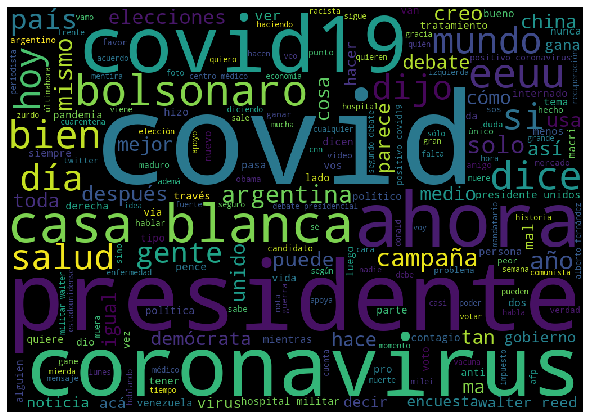

In [658]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud_a)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('a.png')
plt.show()


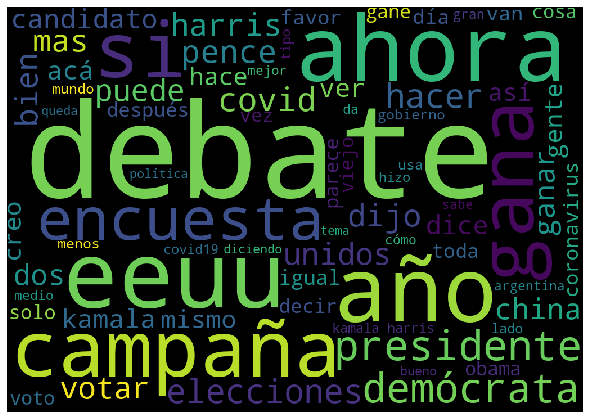

In [659]:
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(wordcloud_b)
plt.axis('off')
plt.tight_layout(pad=0)
plt.savefig('b.png')
plt.show()


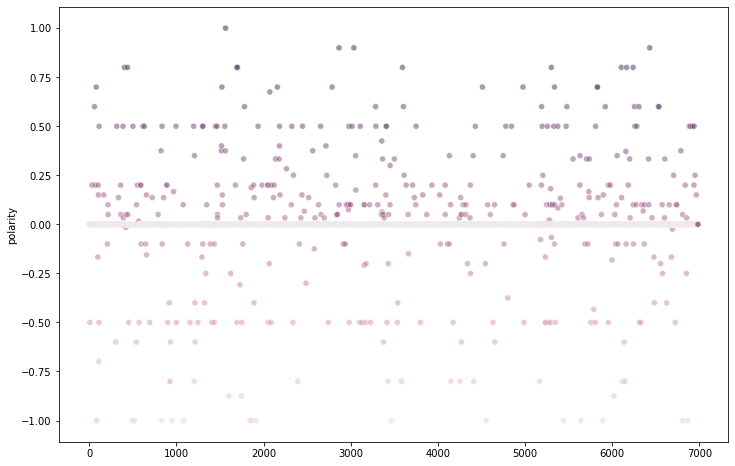

In [608]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.scatterplot(data=df_a, x=df_a.index, y="polarity", hue="polarity", legend=False, alpha=.5, ax=ax)

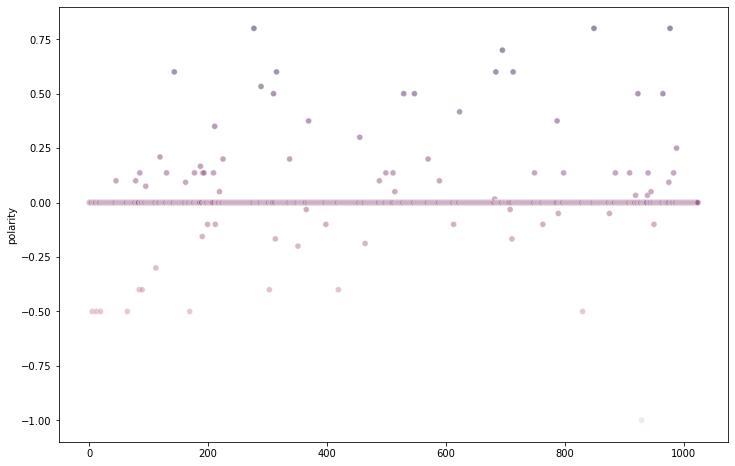

In [591]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.scatterplot(data=df_b, x=df_b.index, y="polarity", hue="polarity", legend=False, alpha=.5, ax=ax)